In [1]:
from ctlearn_manager.tri_model import CTLearnTriModelManager
from ctlearn_manager.io.io import load_model_from_index, load_DL2_data_RF
from ctlearn_manager.utils.DL2_processing import DL2DataProcessor
from ctlearn_manager.utils.RF_counterpart import RFCounterpart, LazyRFCounterpart
from ctlearn_manager.utils.utils import ClusterConfiguration
import astropy.units as u

🔧 Using cluster lst-cluster with account aswg and python environment ctlearn
🔧 Using cluster lst-cluster with account aswg and python environment ctlearn
🔧 Using cluster lst-cluster with account aswg and python environment ctlearn


In [2]:
MODEL_INDEX_FILE = "/home/bastien.lacave/PhD/Analysis/CTLearnManager/ctlearn_models_index.h5"
i = 4
cluster_config = ClusterConfiguration(python_env='ctlearn', partition='short', time='2:00:00', use_cluster=True)
energy_model = load_model_from_index(f"LST1_energy_CRABdec_{i}", MODEL_INDEX_FILE)
direction_model = load_model_from_index(f"LST1_direction_CRABdec_{i}", MODEL_INDEX_FILE)
type_model = load_model_from_index(f"LST1_type_CRABdec_{i}", MODEL_INDEX_FILE)
Stereo_Tri_Model = CTLearnTriModelManager(direction_model=direction_model, energy_model=energy_model, type_model=type_model, cluster_configuration=cluster_config)

🔧 Using cluster lst-cluster with account aswg and python environment ctlearn
🧠 Model name: LST1_energy_CRABdec_4
🧠 Model name: LST1_direction_CRABdec_4
🧠 Model name: LST1_type_CRABdec_4


In [3]:
import glob
dl2_files_tjark = glob.glob("/fefs/aswg/workspace/tjark.miener/DeepCrab_new/DL2/real/dl2_LST-1.Run0*.h5")
dl2_files_bastien = glob.glob("/fefs/aswg/workspace/bastien.lacave/ctlearnLSTData/DL2_Multimodels/03232/LST-1.Run03232.*.dl2.h5")
# print(len(dl2_files_bastien))
# Theta2plot = DL2DataProcessor(dl2_files_tjark, Stereo_Tri_Model, gammaness_cut=0.9, dl2_processed_dir="/home/bastien.lacave/PhD/data/CTLearn/Tjark/")
# Theta2plot = DL2DataProcessor(dl2_files_bastien, Stereo_Tri_Model, gammaness_cut=0.9, dl2_processed_dir="/fefs/aswg/workspace/bastien.lacave/ctlearnLSTData/DL2_Multimodels/03232/")
DL2Processor = DL2DataProcessor([
    '/fefs/aswg/workspace/tjark.miener/DeepCrab_new/DL2/real/dl2_LST-1.Run02929.h5',
    '/fefs/aswg/workspace/tjark.miener/DeepCrab_new/DL2/real/dl2_LST-1.Run03232.h5',
    ], Stereo_Tri_Model, gammaness_cut=0.9, dl2_processed_dir="/home/bastien.lacave/PhD/data/CTLearn/Tjark/")
# runs = [2929, 3232]
RFDL2Processor = LazyRFCounterpart(DL2Processor, dl2_processed_dir="/home/bastien.lacave/PhD/data/RF/")



Preprocessing DL2 (~50min/run), only once


Loading processed data: 100%|██████████| 2/2 [00:11<00:00,  5.57s/it]


[2929, 3232]
Preprocessing DL2 (~50min/run), only once


Loading processed data: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


Computing on-off counts...


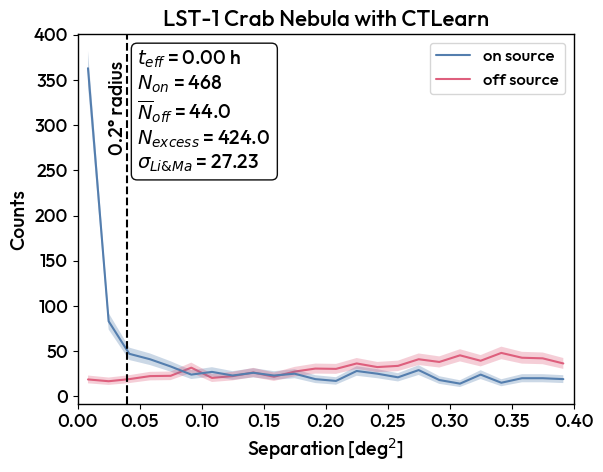

/home/bastien.lacave/miniforge3/envs/ctlearn/lib/python3.10/site-packages/ctlearn_manager/utils/utils.py:261: RuntimeWarning: invalid value encountered in divide
  bin_heights = bin_heights / np.sum(bin_heights)
/home/bastien.lacave/miniforge3/envs/ctlearn/lib/python3.10/site-packages/ctlearn_manager/utils/DL2_processing.py:601: RuntimeWarning: divide by zero encountered in divide
  psf - 1/np.sqrt(np.sum(h_on, axis=1)),
/home/bastien.lacave/miniforge3/envs/ctlearn/lib/python3.10/site-packages/ctlearn_manager/utils/DL2_processing.py:602: RuntimeWarning: divide by zero encountered in divide
  psf + 1/np.sqrt(np.sum(h_on, axis=1)),


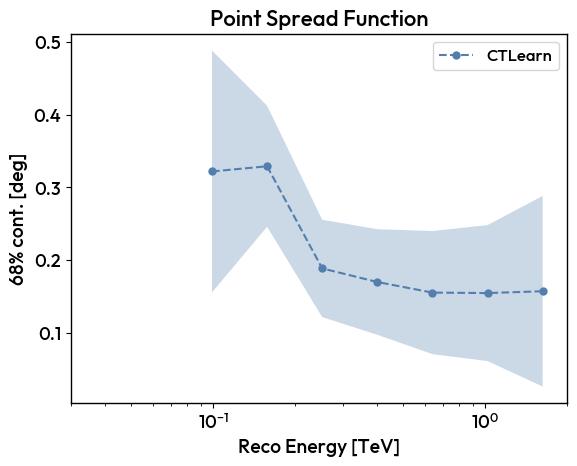

/home/bastien.lacave/miniforge3/envs/ctlearn/lib/python3.10/site-packages/ctlearn_manager/utils/utils.py:244: RuntimeWarning: divide by zero encountered in divide
  flux_factor[tolerance_mask] *= (N_sigma / lima_signi[tolerance_mask])
/home/bastien.lacave/miniforge3/envs/ctlearn/lib/python3.10/site-packages/ctlearn_manager/utils/utils.py:246: RuntimeWarning: invalid value encountered in multiply
  lima_signi[tolerance_mask] = li_ma_significance((time_factor*(flux_factor[tolerance_mask]*


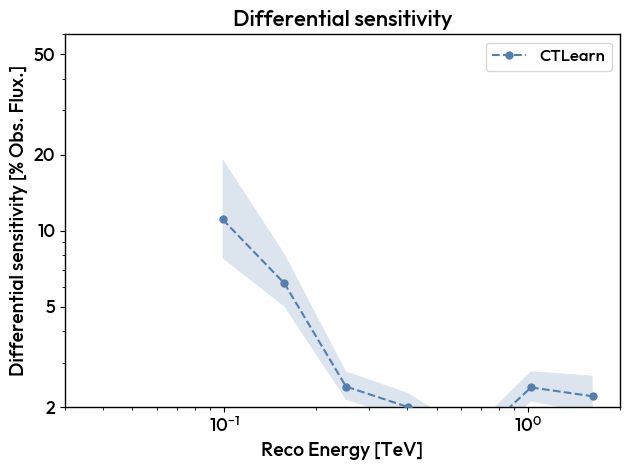

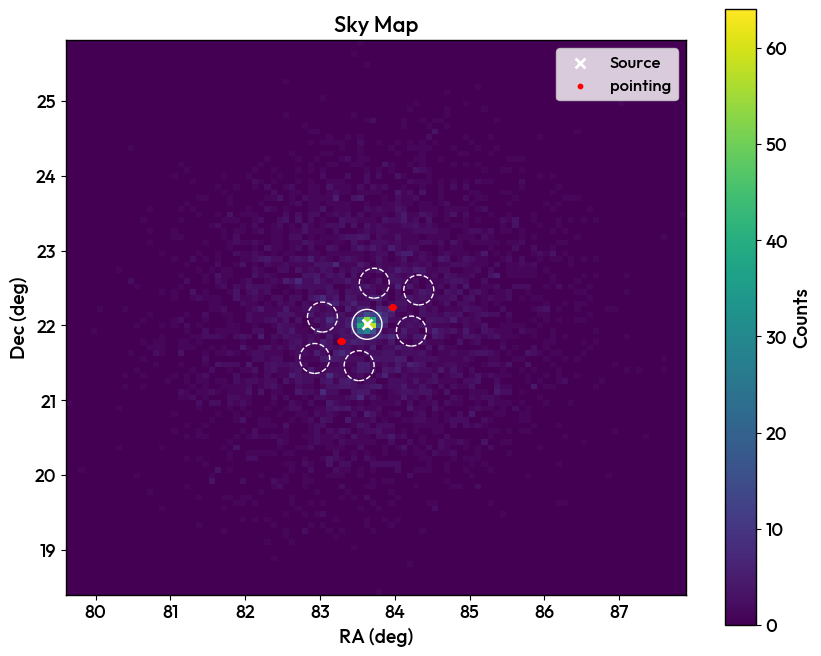

Ranging gammaness cuts: 100%|██████████| 21/21 [07:02<00:00, 20.12s/it]


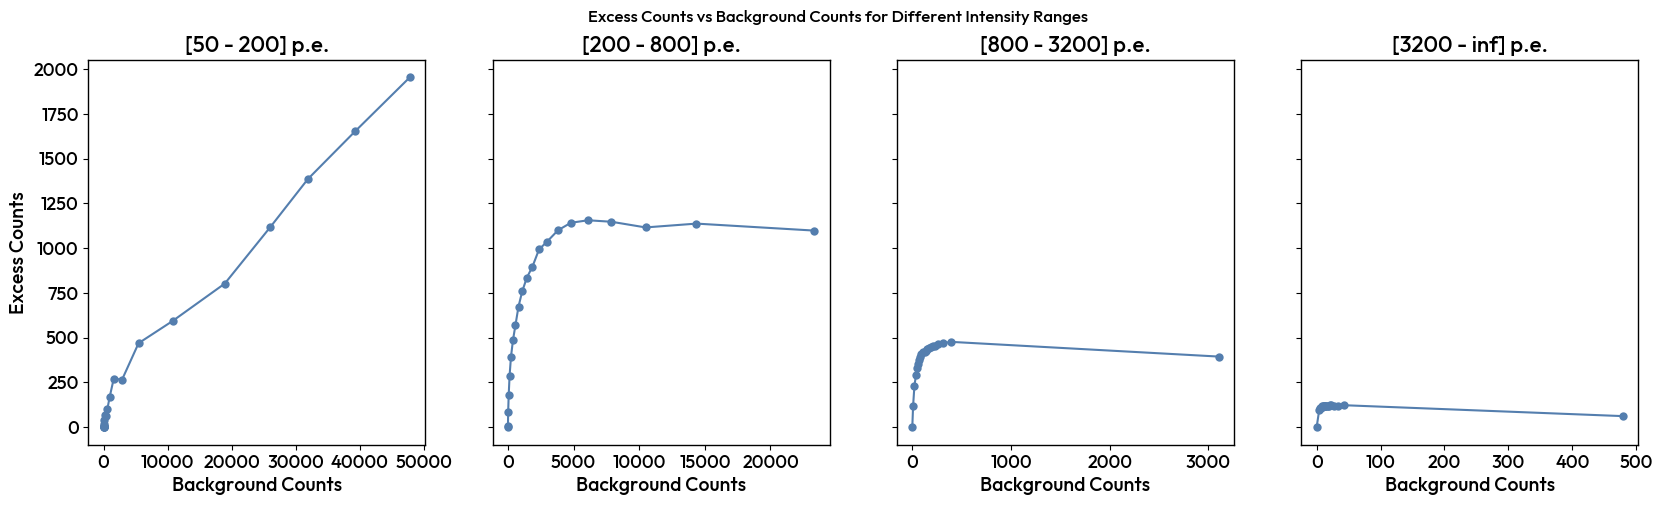

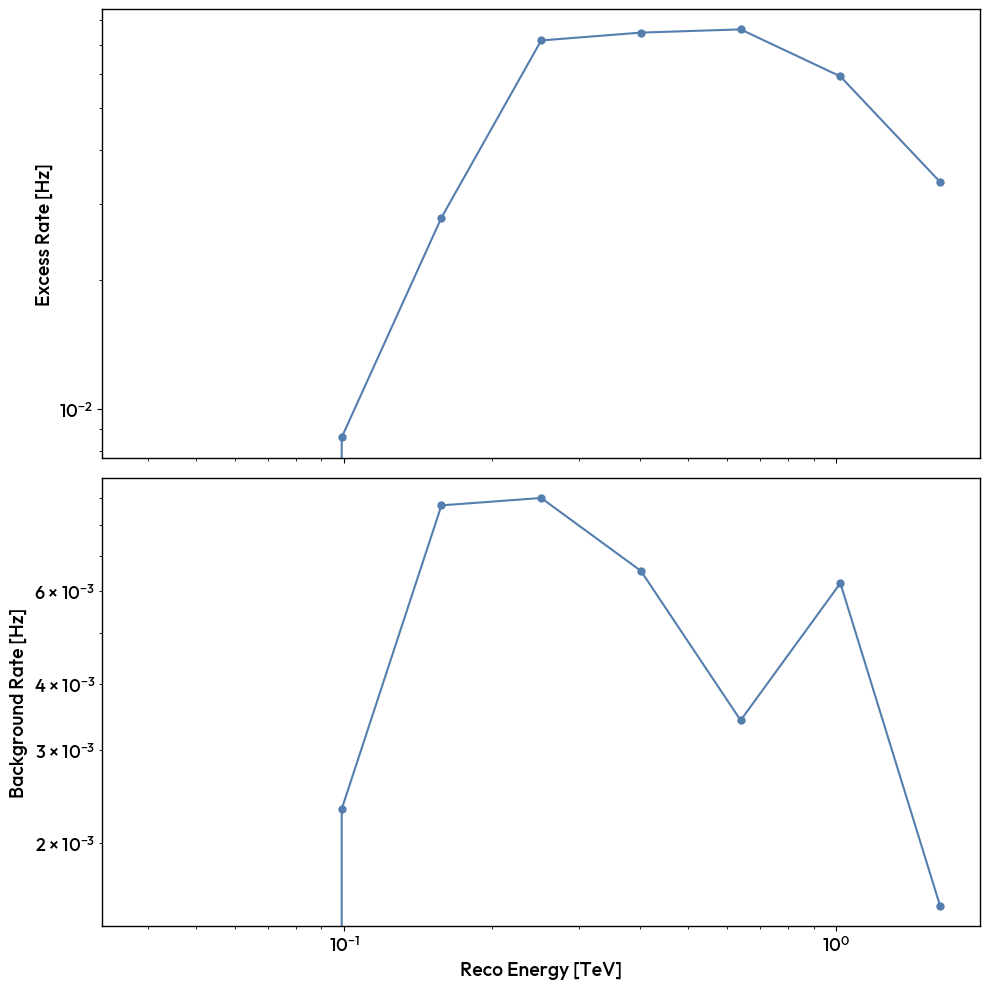

KeyboardInterrupt: 

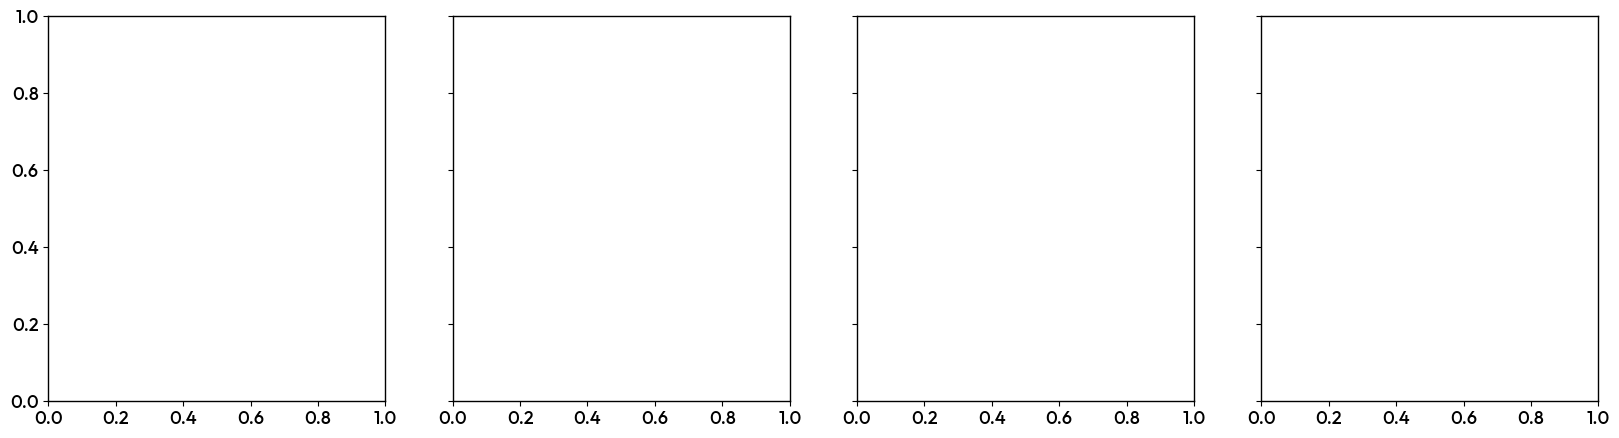

In [4]:
RFDL2Processor.plot_theta2_distribution(25)
RFDL2Processor.plot_PSF()
RFDL2Processor.plot_sensitivity()
RFDL2Processor.plot_skymap()
RFDL2Processor.plot_bkg_discrimination_capability()
RFDL2Processor.plot_excess_and_background_rates_vs_energy()
RFDL2Processor.plot_excess_vs_background_rates()